In [1]:
from datasets import load_dataset

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
dataset = load_dataset("wikimedia/wikipedia", "20231101.ru")

Resolving data files: 100%|██████████| 21/21 [00:00<00:00, 38.04it/s]


In [54]:
df = dataset['train'].to_pandas()

In [55]:
df.shape

(1945063, 4)

In [3]:
from data_utils import prepare_tokenizer_dataset

In [4]:
train_data, val_data, tokenizer = prepare_tokenizer_dataset(format_v=2, max_ctx_len=4096)

Loading dataset...


Resolving data files: 100%|██████████| 21/21 [00:00<00:00, 35.90it/s]


Loaded.
Convert to pandas...
Converted.
Splitting...
Splitted. Train samples: 10000. Test samples: 1000


Map: 100%|██████████| 1000/1000 [00:18<00:00, 52.84 examples/s]


In [50]:
it = iter(val_data)
for i in range(142):
    x = next(it)

In [51]:
len(x['labels'])

319

In [56]:
lengths = list(map(lambda x: len(x), df.text))

In [57]:
import matplotlib.pyplot as plt

(array([1.939877e+06, 4.354000e+03, 6.780000e+02, 1.060000e+02,
        3.000000e+01, 7.000000e+00, 5.000000e+00, 3.000000e+00,
        1.000000e+00, 2.000000e+00]),
 array([1.000000e+00, 4.470840e+04, 8.941580e+04, 1.341232e+05,
        1.788306e+05, 2.235380e+05, 2.682454e+05, 3.129528e+05,
        3.576602e+05, 4.023676e+05, 4.470750e+05]),
 <BarContainer object of 10 artists>)

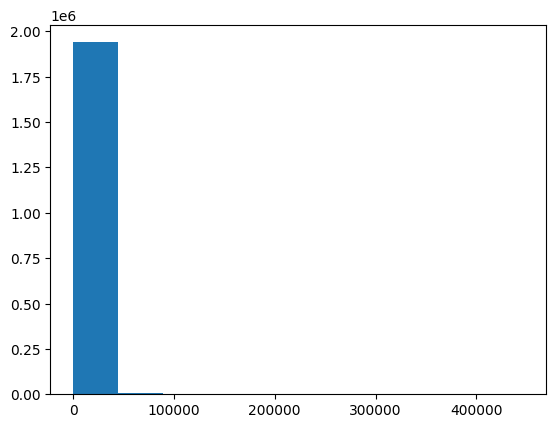

In [58]:
plt.hist(lengths)

In [149]:
select = list(map(lambda x: \
    len(x) > 20000 and 
    x.count('\n') < 260 and 
        len(x) < 30000, df.text))

In [150]:
selected_df = df[select]

In [151]:
selected_df.shape

(12776, 4)

In [152]:
lengths2 = list(map(lambda x: len(x), selected_df.text))

(array([2122., 1837., 1698., 1488., 1257., 1086.,  922.,  848.,  820.,
         698.]),
 array([20001. , 21000.2, 21999.4, 22998.6, 23997.8, 24997. , 25996.2,
        26995.4, 27994.6, 28993.8, 29993. ]),
 <BarContainer object of 10 artists>)

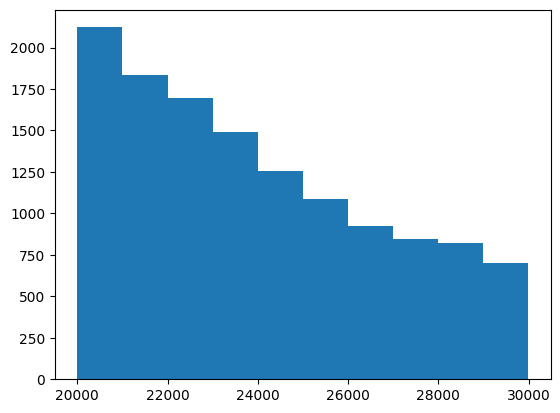

In [153]:
plt.hist(lengths2)

In [154]:
long_text_only = selected_df[['text']]

In [155]:
long_text_only.reset_index(inplace=True)

In [158]:
long_text_only.to_parquet('long_text_wiki.prk', index=False)

In [159]:
import pandas as pd

In [160]:
pd.read_parquet('long_text_wiki.prk')

,index,text
0,5,Социо́ника — псевдонаучная концепция типов лич...
1,6,"Шко́ла (от — досуг, учебное занятие, школа) —..."
2,13,Военный коммунизм — название внутренней полити...
3,30,Дворцо́вая пло́щадь (с 1918 до 1944 — площадь ...
4,32,"Эрмита́ж (от — место уединения, келья, приют ..."
...,...,...
12771,1942915,УТБ (УТБ-2) — учебно-тренировочный бомбардиров...
12772,1943158,Анатолий Михайлович Иванов (род. 2 апреля 1935...
12773,1943580,Русские военнопленные в Османской империи — ро...
12774,1943820,"В послевоенной литературе, склонной к сенсация..."


: 

In [156]:
len(long_text_only.loc[0].text)

29249

In [157]:
len(tokenizer(long_text_only.loc[0].text)['input_ids'])

6612

In [131]:
print(long_text_only.loc[6].text)

Дворцо́вая пло́щадь (с 1918 до 1944 — площадь Урицкого) — главная площадь Санкт-Петербурга, архитектурный ансамбль, возникший во второй половине XVIII — первой половине XIX века.

Площадь образуют памятники истории и культуры федерального значения: Зимний дворец, Здание штаба Гвардейского корпуса, Здание Главного штаба с Триумфальной аркой, Александровская колонна. Её размеры составляют около 5,4 га; существует также неверная оценка в 8 га. В составе исторической застройки центра Санкт-Петербурга площадь включена в список всемирного наследия и является пешеходной зоной.

Во время праздничных мероприятий на площади может собраться до 35 тысяч человек (на «Алых парусах» в 2016 году).

История названия 
Первоначальное название Адмиралтейский луг (включал также территорию современного Александровского сада) известно с 1736 года. Дано по Адмиралтейской верфи. Наименование существовало до 1772 года.

Наименование Дворцовая площадь известно с 1766 года. Дано по расположенному рядом Зимнему дв

In [104]:
long_text_only.loc[3].text.count('\n')

269

In [105]:
n_counts = list(map(lambda x: x.count('\n'), long_text_only.text))

(array([5.3610e+03, 1.4572e+04, 6.8280e+03, 2.6980e+03, 1.2620e+03,
        6.3000e+02, 3.7400e+02, 2.5000e+02, 1.2900e+02, 8.9000e+01,
        5.8000e+01, 4.0000e+01, 3.7000e+01, 1.8000e+01, 1.6000e+01,
        1.5000e+01, 1.3000e+01, 1.4000e+01, 7.0000e+00, 7.0000e+00,
        1.1000e+01, 7.0000e+00, 5.0000e+00, 5.0000e+00, 8.0000e+00,
        5.0000e+00, 5.0000e+00, 2.0000e+00, 5.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

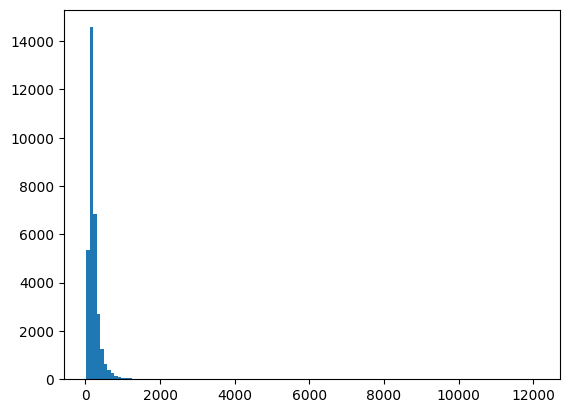

In [107]:
plt.hist(n_counts, bins=128)